In [11]:
!pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 7.0 MB/s eta 0:00:0000:0100:010m
  Using cached mpmath-1.2.1-py3-none-any.whl (532 kB)


In [42]:
from pathlib import Path
from reader import show_uproot_tree, readInfoFromRoot, genChunkFromRoot
import matplotlib.pyplot as plt

dataset_dir = Path('dataset')
root_file = "farichsim_pi-pi-_45-360deg_1200.0k_ideal_2020-12-24_rndm.root"
root_path = dataset_dir / root_file

In [43]:
target_columns = ["x_c", "y_c", "t_c", "nhits"]
chunk = next(genChunkFromRoot(root_path, needNoise=False, verbose=False))
df = chunk.loc[(0, 0):(1, -1)][target_columns].sort_values(by="t_c")

nevents: 1200000
zdis: 1.0
nlayers: 4
array_size: 26.68
array_gap: 1.0
pixel_size: 3.16
pixel_gap: 0.2
pixel_numx: 8
nxarrays: 30
nyarrays: 30
distance: 200.0
trg_window_ns: 20.0
W: 35.0
n_mean: 1.0453999999999999
n_max: 1.05
Processing ROOT file dataset/farichsim_pi-pi-_45-360deg_1200.0k_ideal_2020-12-24_rndm.root with 1200000 simulated events...

  Processing next chunk...
    1992 entries with 63072 hits to process


<AxesSubplot: xlabel='x_c', ylabel='y_c'>

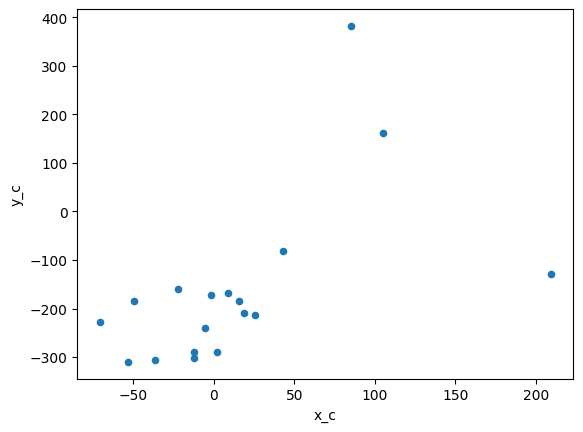

In [44]:
df.plot.scatter("x_c", "y_c")

In [48]:
from numpy.linalg import eig, inv
def fit_ellipse(x, y):
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]
    D =  np.column_stack((x**2, x*y, y**2, x, y, np.ones_like(x)))
    S = np.dot(D.T, D)
    C = np.zeros([6,6])
    C[0, 2] = C[2, 0] = 2
    C[1, 1] = -1
    E, V = eig(np.dot(inv(S), C))
    n = np.argmax(np.abs(E))
    return V[:, n]

In [50]:
A, B, C, D, E, F = fit_ellipse(df["x_c"].to_numpy(), df["y_c"].to_numpy())

In [54]:
K = D**2/(4*A) + E**2/(4*C) - F
a, b = np.sqrt(K/A), np.sqrt(K/C)
# a, b
print('a:',a, 'b:', b)

a: 451.2185461156137 b: 596.546513931265


In [58]:
def ellipse(t, a, b):
    return a*np.cos(t), b*np.sin(t)

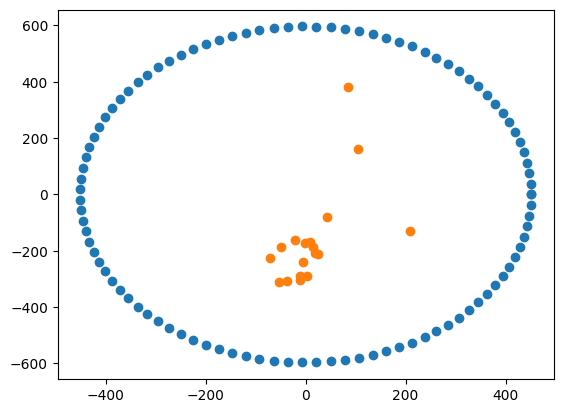

In [62]:
points = [ellipse(t, a, b) for t in np.linspace(0, 2*np.pi, 100)]
x, y = [np.array(v) for v in list(zip(*points))]

fig = plt.figure()
plt.scatter(x, y)
plt.scatter(df["x_c"].to_numpy(), df["y_c"].to_numpy())
plt.show()

In [17]:
parsing.sympy_parser.parse_expr("-x_2*y_1*z+x_3*y_1*z+x_1*y_2*z-x_3*y_2*z-x_1*y_3*z+x_2*y_3*z+x_2*y*z_1-x_3*y*z_1-x*y_2*z_1+x_3*y_2*z_1+x*y_3*z_1-x_2*y_3*z_1-x_1*y*z_2+x_3*y*z_2+x*y_1*z_2-x_3*y_1*z_2-x*y_3*z_2+x_1*y_3*z_2+x_1*y*z_3-x_2*y*z_3-x*y_1*z_3+x_2*y_1*z_3+x*y_2*z_3-x_1*y_2*z_3")

In [30]:
str(exp)

'x*y_1*z_2 - x*y_1*z_3 - x*y_2*z_1 + x*y_2*z_3 + x*y_3*z_1 - x*y_3*z_2 - x_1*y*z_2 + x_1*y*z_3 + x_1*y_2*z - x_1*y_2*z_3 - x_1*y_3*z + x_1*y_3*z_2 + x_2*y*z_1 - x_2*y*z_3 - x_2*y_1*z + x_2*y_1*z_3 + x_2*y_3*z - x_2*y_3*z_1 - x_3*y*z_1 + x_3*y*z_2 + x_3*y_1*z - x_3*y_1*z_2 - x_3*y_2*z + x_3*y_2*z_1'

In [52]:
before_x = [ i  for i in Add.make_args(exp) if 'x' in str(i) and 'x_' not in str(i) ]
before_y = [ i  for i in Add.make_args(exp) if 'y' in str(i) and 'y_' not in str(i) ]
before_z = [ i  for i in Add.make_args(exp) if 'z' in str(i) and 'z_' not in str(i) ]
empty = [ i  for i in Add.make_args(exp) if  'z_'  in str(i)  and 'x_'  in str(i)  and 'y_'  in str(i)]

In [53]:
empty

[x_1*y_3*z_2,
 x_2*y_1*z_3,
 x_3*y_2*z_1,
 -x_1*y_2*z_3,
 -x_2*y_3*z_1,
 -x_3*y_1*z_2]

In [45]:
class Point:
    x, y, z
    def __init__(self, x, y, z):
        self.x=x
        self.y=y
        self.z=z
    def get_raw(self):
        return self.x, self.y, self.z

In [1]:
from geometry import Plain, Vector, Point

In [73]:
def get_plain_coefs(point1: Point, point2: Point, point3: Point)->[float, float, float]:
    
    x1, y1, z1 = point1.get_raw()
    x2, y2, z2 = point2.get_raw()
    x3, y3, z3 = point3.get_raw()
    return y1*z2+y2*z3+y3*z1-y1*z3-y2*z1-y3*z2, x1*z3+x2*z1+x3*z2-x1*z2-x2*z3-x3*z1, x1*y2+x2*y3+x3*y1-x1*y3-x2*y1-x3*y2, x1*y3*z2+x2*y1*z3+x3*y2*z1-x1*y2*z3-x2*y3*z1-x3*y1*z2

In [2]:
p = Plain(Point(-3, 2, -1), Point(-1, 2,4), Point(3,3,-1))

In [3]:
print(p)

-5x+(30)y+(2)z+(-73)=0


In [4]:
p.check_point(Point(-3, 2, -1))

True

In [5]:
bb

array([[ -6,  12,   5],
       [  0,   2, -30],
       [-15,   0,  -2]])

In [6]:
from skspatial.objects import Plane, Point
from skspatial.plotting import plot_3d

In [65]:
a = Point([-3, 2, -1])
b = Point([-1, 2, 4])
c = Point([3, 3, -1])

p = Plane.from_points(a, b, c)

In [66]:
p

Plane(point=Point([-3,  2, -1]), normal=Vector([-5, 30,  2]))

In [67]:
p.normal + a 

Vector([-8, 32,  1])

In [68]:
import numpy as np
np.linalg.inv(np.column_stack((b-a, c-a, p.normal+a))).dot(b-a) 

array([1., 0., 0.])

In [ ]:
def check_point_in_plane():
    '''
    x-x_1	y-y_1	z-z_1
    x_2-x_1 y_2-y_1 z_2-z_1 = -x_2*y_1*z+x_3*y_1*z+x_1*y_2*z-x_3*y_2*z-x_1*y_3*z+x_2*y_3*z+x_2*y*z_1-x_3*y*z_1-x*y_2*z_1+x_3*y_2*z_1+x*y_3*z_1-x_2*y_3*z_1-x_1*y*z_2+x_3*y*z_2+x*y_1*z_2-x_3*y_1*z_2-x*y_3*z_2+x_1*y_3*z_2+x_1*y*z_3-x_2*y*z_3-x*y_1*z_3+x_2*y_1*z_3+x*y_2*z_3-x_1*y_2*z_3
    x_3-x_2 y_3-y_2 z_3-z_2
    '''
    pass

# det([[x-x_1,	y-y_1,	z -z_1],[x_2-x_1, y_2-y_1, z_2-z_1] , [x_3-x_2, y_3-y_2, z_3-z_2]]), as x,y,z